# Project on Data Analysis and Mining 2019/2020


Aron Gaden, Annie Witschas, Rebekka Görge

1. Linear Regression
2. Principal Component Analysis 
3. Clustering

### Part1: Linear Regression

In [1]:
# Numpy for data management
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Pandas also for data management
import pandas as pd
import io
# Seaborn for plotting and styling
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

df2 = pd.read_csv('data_selection.csv',sep=',')
sns.set()
data=df2.to_numpy()
cols = ['No','year','month','day','hour','PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']

df2 = pd.DataFrame(data, columns=cols)


**Linear Regression between CO and WSPM**

**a)** *Select two features in your dataset with more or less “linear‐like” scatterplot. Display the scatter‐plot, and make a comment on it.*

In [2]:
# select columns "wind speed per minunte" (WSPM) and "Ozone" (O3)
x=df2['WSPM'].to_numpy()
x=np.reshape(x,(-1,1))
y=df2['O3'].to_numpy()


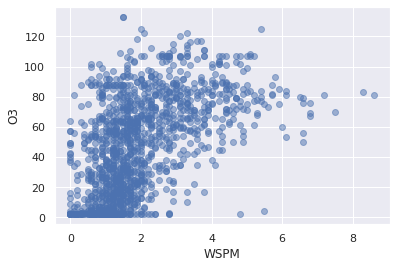

In [3]:
ax = sns.regplot(x=x, y=y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='WSPM', 
       ylabel='O3');
ax.figure.savefig("scatter_plot.svg")


**b)** *Build a linear regression of one of the features over the other. Obtain a normal probability plot of the standardized residuals from this regression. Does the normal probability plot indicate acceptable normality, or is there any skewness? If a skewness, what is the type of it?*

In [4]:
from numpy.linalg import inv
from numpy.linalg import det
from numpy import dot

In [5]:
# calculate beta for the linear regression
beta = np.linalg.lstsq(x, y)[0]

print(beta)

[20.80505004]


/home/oran/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


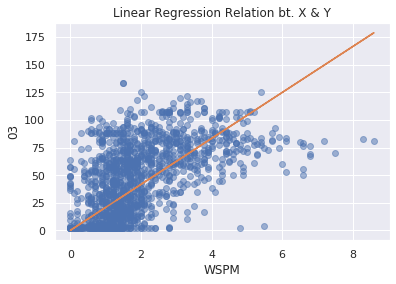

In [6]:
# calculate the predictions
predictions = x* beta 
predictions_withouth_intercept = predictions

ax = sns.regplot(x=x, y=y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='WSPM', 
       ylabel='03',
       title='Linear Regression Relation bt. X & Y');

# plot the linear regression line over the plot  
plt.plot(x, predictions) 
plt.show()

/home/oran/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


Estimated coefficients: [22.08067686 13.00532788]


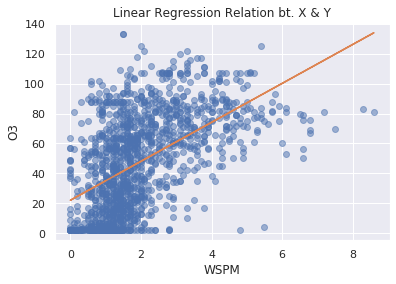

In [7]:
# improve the fit of the regression line
x=df2['WSPM'].to_numpy()
y=df2['O3'].to_numpy()

constant_term = np.ones(len(x)) 
# append constant term as a column of x
x = np.c_[constant_term, x]

beta = np.linalg.lstsq(x, y)[0]
print('Estimated coefficients:', beta)
# reshape beta 
beta = np.reshape(beta,(-1,1))

# compute new predictions
predictions_with_intercept = dot(x,beta) 

ax = sns.regplot(x=x[:,1], y=y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='WSPM', 
       ylabel='O3',
       title='Linear Regression Relation bt. X & Y');
plt.plot(x[:,1], predictions_with_intercept) # overlay a line plot over a scatter plot 
plt.show()
ax.figure.savefig("adapted_regression_line.svg")

In [8]:
# calculate residuals and coefficient of determination 

### SSTotal
def ss_total(y):
    mean=np.mean(y)
    total= np.sum((y-mean)**2)
    return total

# The regression sum of squares, also called the explained sum of squares:
def ss_reg(pred, y):
    mean= np.mean(y)
    ssr= np.sum((pred-mean)**2)
    return ssr

# The sum of squares of residuals, also called the residual sum of squares:
def ss_res(pred, y):
    sst=np.sum((pred-y)**2)
    return sst

# SStotal
sstotal = ss_total(y)

ss_total_using_variance = (len(y) - 1 ) * np.var(y, ddof=1) 

# SSReg
ssreg = ss_reg(predictions_with_intercept, y)

# SSRes
ssres = ss_res(predictions_with_intercept, y)

### R^2
rsq_with_intercept = 1 - (ssreg / sstotal)


print('SStotal:', round(sstotal,4))
print('SSreg:', round(ssreg,4))
print('SSres:', round(ssres,4))

print('Coefficient of Determinacy, model with intercept:', np.round(rsq_with_intercept,2))

SStotal: 1422247.2873
SSreg: 393435.3509
SSres: 2471144070.5663
Coefficient of Determinacy, model with intercept: 0.72


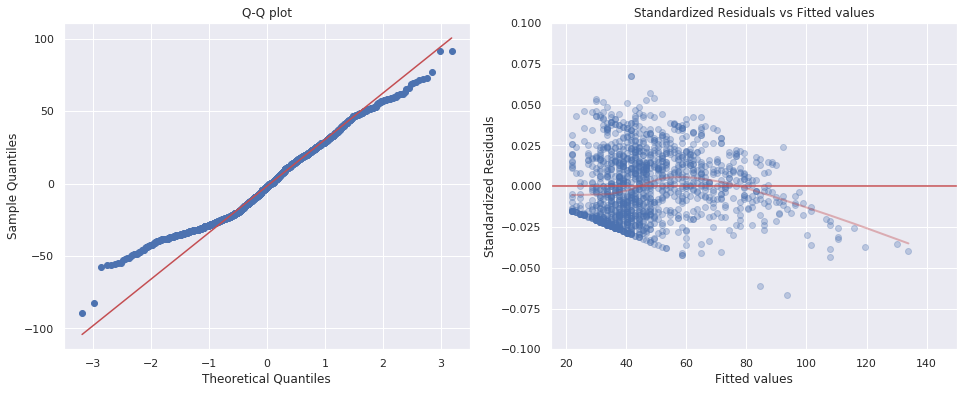

In [9]:
#make normalization plot and plot of residuals vs fits

fig, axs = plt.subplots(ncols=2, # Set the number of columns to split the figure in
                        figsize=(16, 6)) # size of the whole figure

# re-computing our model values
predictions = dot(x,beta)
residuals = y - predictions[:,0]
degrees_of_freedom = len(y) - x.shape[1]
x_val = x[:,1]

sm.qqplot(residuals, 
          stats.t,
          distargs=(degrees_of_freedom,), 
          line='q', 
          ax=axs[0])
axs[0].set_title(label = 'Q-Q plot')
axs[0].set_xlim(-3.5,3.5)

residuals_standard_error = np.sqrt(ssres / degrees_of_freedom)
mean_independent_variable = np.sum(x_val)/len(x_val)
leverage = (1 / len(x_val)) +   (x_val-mean_independent_variable)**2\
                                    /np.sum((x_val-mean_independent_variable)**2) 
leverage = np.reshape(leverage,(-1,1))
s_resid = residuals_standard_error * np.sqrt(1-leverage)
standardized_rediduals = residuals / s_resid[:,0]
ax1=sns.regplot(x=predictions[:,0], 
            y=standardized_rediduals, 
            ax=axs[1],
            lowess=True, 
            scatter_kws={'alpha':0.3}, 
            line_kws={"color":"r","alpha":0.4,"lw":2})
ax1.figure.savefig("normal_probabilty_plot.svg")

plt.plot(np.arange(len(standardized_rediduals)), [0]*len(standardized_rediduals), 'r-')
axs[1].set_ylim(-0.1,0.1)
axs[1].set_xlim(15, 150)
axs[1].set(ylabel='Standardized Residuals', 
           xlabel='Fitted values');
axs[1].set_title(label = 'Standardized Residuals vs Fitted values');
axs[1].figure.savefig("stand_vs_fitted_values.svg")

**c)** *Take the natural log of both of the variables and perform a linear regression on the transformed features. Obtain a normal probability plot of the standardized residuals from this regression. Discuss if this probability plot indicates an acceptable level of normality?*

In [10]:
x=df2['WSPM'].to_numpy()
x=np.reshape(x,(-1,1))
y=df2['O3'].to_numpy()

mask = y != 0
y_masked = y[mask]

x_masked = x[mask]

y_masked = np.log(y_masked)

/home/oran/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


Estimated coefficients: [1.33466911]
Estimated coefficients: [1.33466911]


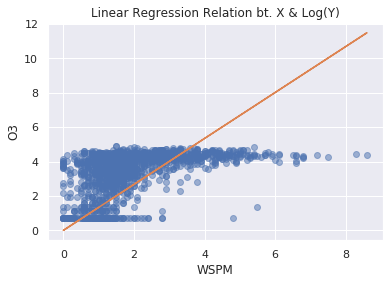

In [11]:
# estimate the coefficients
beta_log = np.linalg.lstsq(x_masked, y_masked)[0]
beta2_log = dot(dot(inv(dot(x_masked.T, x_masked)),x_masked.T),y_masked) 
print('Estimated coefficients:', beta_log)
print('Estimated coefficients:', beta2_log)

beta_log = np.reshape(beta_log,(-1,1))

# compute new predictions
predictions_log = dot(x_masked,beta_log) 

ax = sns.regplot(x=x_masked, y=y_masked, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='WSPM', 
       ylabel='O3',
       title='Linear Regression Relation bt. X & Log(Y)');
plt.plot(x_masked, predictions_log) # overlay a line plot over a scatter plot 
plt.show()

#NORMAL DISTRIBUTION

(1361, 2)
Estimated coefficients: [2.52616222 0.44233399]
Old shape of coefficients array: (2,)
New shape of coefficients array: (2, 1)


/home/oran/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


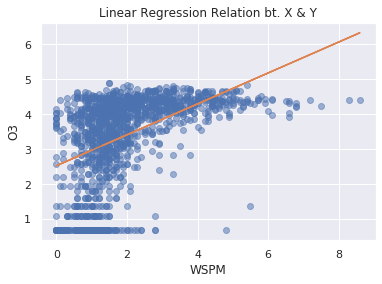

In [12]:

constant_term = np.ones(len(x_masked)) 
# append constant term as a column of x
x_masked = np.c_[constant_term, x_masked]

print(x_masked.shape)


beta_log = np.linalg.lstsq(x_masked, y_masked)[0]
print('Estimated coefficients:', beta_log)

# to use the dot product function we have to state that the coefficients vector is of the shape (2,1)
print('Old shape of coefficients array:',beta_log.shape)
beta_log = np.reshape(beta_log,(-1,1))
print('New shape of coefficients array:',beta_log.shape)

# compute new predictions
predictions_with_intercept_log = dot(x_masked,beta_log) 

ax = sns.regplot(x=x_masked[:,1], y=y_masked, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='WSPM', 
       ylabel='O3',
       title='Linear Regression Relation bt. X & Y');
plt.plot(x_masked[:,1], predictions_with_intercept_log) # overlay a line plot over a scatter plot 
plt.show()

In [13]:
#y_masked = np.reshape(y_masked, (-1,1))
# SStotal
sstotal_log = ss_total(y_masked)

# We could also obtain SStotal using the target's variance
# don't forget to get an unbiased estimate of the variance 
ss_total_using_variance_log = (len(y_masked) - 1 ) * np.var(y_masked, ddof=1) 
# SSReg
ssreg_log = ss_reg(predictions_with_intercept_log[:,0], y_masked)
# SSRes
ssres_log = ss_res(predictions_with_intercept_log[:,0], y_masked)

### R^2
rsq_with_intercept_log = 1 - (ssres_log / sstotal_log)


print('SStotal:', round(sstotal_log,4))
print('SSreg:', round(ssreg_log,4))
print('SSres:', round(ssres_log,4))
print('Coefficient of Determinacy, model with intercept:', rsq_with_intercept_log)

SStotal: 2033.1591
SSreg: 455.1257
SSres: 1578.0333
Coefficient of Determinacy, model with intercept: 0.22385151616667542


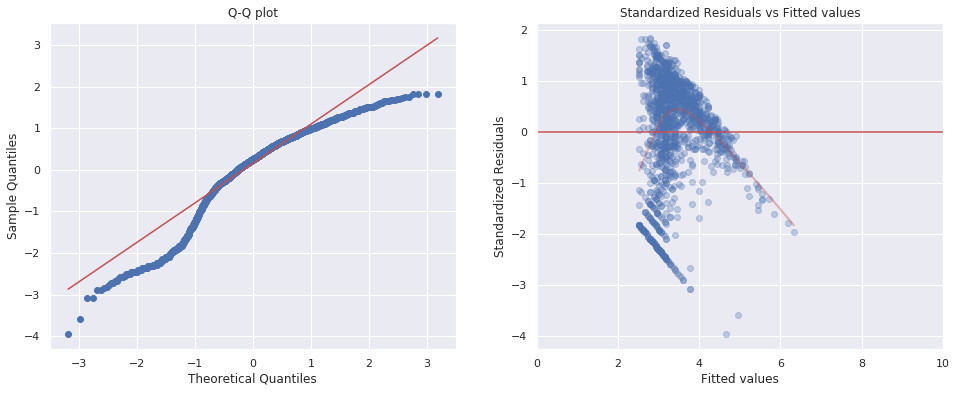

In [14]:
#x=x_masked
#y=y_masked
fig, axs = plt.subplots(ncols=2, # Set the number of columns to split the figure in
                        figsize=(16, 6)) # size of the whole figure

# re-computing our model values
predictions_log = dot(x_masked,beta_log)
residuals_log = y_masked - predictions_log[:,0]
#residuals = y - predictions
degrees_of_freedom_log = len(y_masked) - x_masked.shape[1]

sm.qqplot(residuals_log, 
          stats.t,
          distargs=(degrees_of_freedom_log,), 
          line='q', 
          ax=axs[0])
axs[0].set_title(label = 'Q-Q plot')
axs[0].set_xlim(-3.5,3.5)

#residuals_standard_error = np.sqrt(ssres/(len(x)-1-1))
residuals_standard_error_log = np.sqrt((1/degrees_of_freedom_log)*np.sum(residuals_log**2))
#mean_independent_variable = np.sum(x)/len(x)
mean_independent_variable_log = np.mean(x_masked[:,1])

leverage_log = (1/len(x_masked))+(((x_masked[:,1]-mean_independent_variable_log)**2)/(np.sum((x_masked[:,1]-mean_independent_variable_log)**2)))
standardized_rediduals_log = np.divide(residuals_log,(np.sqrt(1-leverage_log)))
predictions_log = np.reshape(predictions_log, (-1,1))

sns.regplot(x=predictions_log[:,0], 
            y=standardized_rediduals_log, 
            ax=axs[1],
            lowess=True, 
            scatter_kws={'alpha':0.3}, 
            line_kws={"color":"r","alpha":0.4,"lw":2})
plt.plot(np.arange(len(standardized_rediduals_log)), [0]*len(standardized_rediduals_log), 'r-')
#axs[1].set_ylim(-3.5,3.5)
axs[1].set_xlim(0.0,10.0)

axs[1].set(ylabel='Standardized Residuals', 
           xlabel='Fitted values');
axs[1].set_title(label = 'Standardized Residuals vs Fitted values');
axs[1].figure.savefig("normal_plot_log.svg")

As our results are not yet good enough, we use the log function on both variables and try to improve the results. 

In [15]:
# use log for x and y 
x=df2['WSPM'].to_numpy()
y=df2['O3'].to_numpy()

mask_temp = y != 0
y_masked_temp = y[mask_temp]
x_masked_temp = x[mask_temp]

mask_x_temp=x_masked_temp!=0

x_masked_ln=x_masked_temp[mask_x_temp]
y_masked_ln=y_masked_temp[mask_x_temp]


y_masked_ln= np.log(y_masked_ln)
x_masked_ln=np.log(x_masked_ln)
x_masked_ln=np.reshape(x_masked_ln,(-1,1))

/home/oran/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


Estimated coefficients: [2.896579]


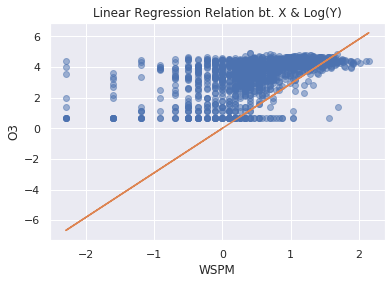

In [16]:
# estimate the coefficients for ln(x) and ln(y)
beta_ln = np.linalg.lstsq(x_masked_ln, y_masked_ln)[0]
print('Estimated coefficients:', beta_ln)

beta_ln = np.reshape(beta_ln,(-1,1))

# compute new predictions
predictions_ln = dot(x_masked_ln,beta_ln) 

ax = sns.regplot(x=x_masked_ln, y=y_masked_ln, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='WSPM', 
       ylabel='O3',
       title='Linear Regression Relation bt. X & Log(Y)');
plt.plot(x_masked_ln, predictions_ln) # overlay a line plot over a scatter plot 
plt.show()

#NORMAL DISTRIBUTION

(1337, 2)
Estimated coefficients: [2.98249839 0.89626032]
Old shape of coefficients array: (2,)
New shape of coefficients array: (2, 1)


/home/oran/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys


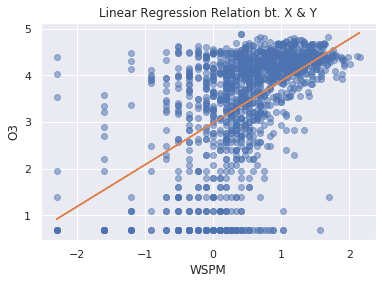

In [17]:
constant_term_ln = np.ones(len(x_masked_ln))

# append constant term as a column of x
x_masked_ln = np.c_[constant_term_ln, x_masked_ln]
print(x_masked_ln.shape)

beta_ln = np.linalg.lstsq(x_masked_ln, y_masked_ln)[0]
print('Estimated coefficients:', beta_ln)

# to use the dot product function we have to state that the coefficients vector is of the shape (2,1)
print('Old shape of coefficients array:',beta_ln.shape)
beta_ln = np.reshape(beta_ln,(-1,1))
print('New shape of coefficients array:',beta_ln.shape)

# compute new predictions
predictions_with_intercept_ln = dot(x_masked_ln,beta_ln) 

ax = sns.regplot(x=x_masked_ln[:,1], y=y_masked_ln, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='WSPM', 
       ylabel='O3',
       title='Linear Regression Relation bt. X & Y');
plt.plot(x_masked_ln[:,1], predictions_with_intercept_ln) # overlay a line plot over a scatter plot 
plt.show()

In [18]:
#y_masked = np.reshape(y_masked, (-1,1))
# SStotal
sstotal_ln = ss_total(y_masked_ln)

# We could also obtain SStotal using the target's variance
# don't forget to get an unbiased estimate of the variance 
ss_total_using_variance_ln = (len(y_masked_ln) - 1 ) * np.var(y_masked_ln, ddof=1) 
# SSReg
ssreg_ln = ss_reg(predictions_with_intercept_ln[:,0], y_masked_ln)
# SSRes
ssres_ln = ss_res(predictions_with_intercept_ln[:,0], y_masked_ln)

### R^2
rsq_with_intercept_ln = 1 - (ssres_ln / sstotal_ln)


print('SStotal:', round(sstotal_ln,4))
print('SSreg:', round(ssreg_ln,4))
print('SSres:', round(ssres_ln,4))
print('Coefficient of Determinacy, model with intercept:', rsq_with_intercept_ln)

SStotal: 1960.0658
SSreg: 519.392
SSres: 1440.6738
Coefficient of Determinacy, model with intercept: 0.26498701060738183


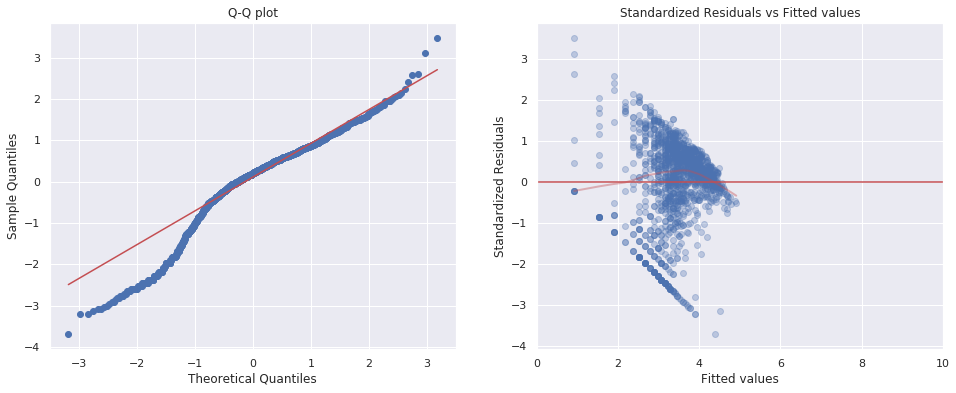

In [19]:
# computer normality plot and residuals vs. fit for linear regression of ln(O3) and ln(WSPM)
fig, axs = plt.subplots(ncols=2, 
                        figsize=(16, 6)) 

# re-computing our model values
predictions_ln = dot(x_masked_ln,beta_ln)
residuals_ln = y_masked_ln - predictions_ln[:,0]
#residuals = y - predictions
degrees_of_freedom_ln= len(y_masked_ln) - x_masked_ln.shape[1]

sm.qqplot(residuals_ln, 
          stats.t,
          distargs=(degrees_of_freedom_ln,), 
          line='q', 
          ax=axs[0])
axs[0].set_title(label = 'Q-Q plot')
axs[0].set_xlim(-3.5,3.5)

#residuals_standard_error = np.sqrt(ssres/(len(x)-1-1))
residuals_standard_error_ln= np.sqrt((1/degrees_of_freedom_ln)*np.sum(residuals_ln**2))
#mean_independent_variable = np.sum(x)/len(x)
mean_independent_variable_ln = np.mean(x_masked_ln[:,1])

leverage_ln= (1/len(x_masked_ln))+(((x_masked_ln[:,1]-mean_independent_variable_ln)**2)/(np.sum((x_masked_ln[:,1]-mean_independent_variable_ln)**2)))
standardized_rediduals_ln = np.divide(residuals_ln,(np.sqrt(1-leverage_ln)))
predictions_ln = np.reshape(predictions_ln, (-1,1))

sns.regplot(x=predictions_ln[:,0], 
            y=standardized_rediduals_ln, 
            ax=axs[1],
            lowess=True, 
            scatter_kws={'alpha':0.3}, 
            line_kws={"color":"r","alpha":0.4,"lw":2})
plt.plot(np.arange(len(standardized_rediduals_ln)), [0]*len(standardized_rediduals_ln), 'r-')
#axs[1].set_ylim(-3.5,3.5)
axs[1].set_xlim(0.0,10.0)

axs[1].set(ylabel='Standardized Residuals', 
           xlabel='Fitted values');
axs[1].set_title(label = 'Standardized Residuals vs Fitted values');
axs[1].figure.savefig("normal_plot_log_log.svg")

**d)** *Write the population regression equation for your model. Interpret the meaning of the values of the parameters b0 and b1.*

In [20]:
# Linear regression equation: "Y= b0+ b1*x "
# from now on we work with the values of ln(x) and ln(y) because we get the best results from here
print('ŷ''={}+{}*x'.format(beta_ln[0][0],beta_ln[1][0]))


# we test the equation with a value and check in the graphic if the values are sensful
test=beta_ln[0][0]+beta_ln[1][0]*np.log(4)

print("Test O3 result for WSPM 4:",np.exp(test))


ŷ=2.9824983907556626+0.8962603202391975*x
Test O3 result for WSPM 4: 68.37306898438966


**e)** *Find the correlation and determinacy coefficients. Analyse and comment on the meaning of both.*

In [21]:
# recompute values of ln(x) and ln(y) to have the right shapes again
x=df2['WSPM'].to_numpy()
y=df2['O3'].to_numpy()
mask_temp = y != 0
y_masked_temp = y[mask_temp]
x_masked_temp = x[mask_temp]
mask_x_temp=x_masked_temp!=0
x_masked_ln=x_masked_temp[mask_x_temp]
y_masked_ln=y_masked_temp[mask_x_temp]
y_masked_ln= np.log(y_masked_ln)
x_masked_ln=np.log(x_masked_ln)
x_masked_ln=np.reshape(x_masked_ln,(-1,1))

#compute the correlation coefficient and the coefficient of the determinancy

constant_term_ln = np.ones(len(x_masked_ln)) 
# append constant term as a column of x
x_masked_ln= np.c_[constant_term_ln, x_masked_ln]

print("Coefficient of Determination:",rsq_with_intercept_ln)
print('Correlation:',np.sqrt(rsq_with_intercept_ln))
print('Correlation:',np.corrcoef(y_masked_ln,x_masked_ln[:,1])[0,1])

#test if our result is corrected
from sklearn.metrics import r2_score
print('Coefficient of Determinacy:',round(r2_score(y_true=y_masked_ln, y_pred=predictions_with_intercept_ln),2))


Coefficient of Determination: 0.26498701060738183
Correlation: 0.5147688904813322
Correlation: 0.5147688904813328
Coefficient of Determinacy: 0.26


**f)** *Test the statistical hypothesis for determining whether a linear relationship exists between the chosen variables.*

In [22]:
n_ln = len(x_masked_ln[:,1])
sigma_degrees_of_freedom_ln = n_ln - 2
# mean squared error
sigma_sqr_ln = ssres_ln/ sigma_degrees_of_freedom_ln
variance_covmatrix_ln = inv((np.matmul(x_masked_ln.T,x_masked_ln)))*sigma_sqr_ln
coeff_stde_ln = [np.sqrt(variance_covmatrix_ln[0,0]),np.sqrt(variance_covmatrix_ln[1,1])]
print('Coefficients\' Standard Errors:',coeff_stde_ln)

Coefficients' Standard Errors: [0.034448183257113456, 0.040853451226532896]


In [23]:
expected_value3 = 0.0

# For each coefficient
for i in range(len(beta_ln)):    
    ttest_ln =np.divide((beta_ln[i]),coeff_stde_ln[i])

    #Degrees of freedom
    df_ln = x_masked_ln.shape[0] - (i+1)
    # https://stats.stackexchange.com/a/140395
    
    pval_ln = stats.t.sf(np.abs(ttest_ln), df_ln)*2  # two-sided pvalue = Prob(abs(t)>tt)
    # https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html#t-test-and-ks-test
    
    print('Test statistc for coefficient estimate ',i,':',ttest_ln,'| P-value:', np.round(pval_ln,10))

Test statistc for coefficient estimate  0 : [86.57926511] | P-value: [0.]
Test statistc for coefficient estimate  1 : [21.93842364] | P-value: [0.]


**g)** *Construct and interpret a 95% confidence interval for the unknown true slope of the regression line.*

In [24]:
# we caluclate a confidence interval for the true slope 
df = x_masked_ln.shape[0]- 2
one_minus_alpha= 0.05
alpha= 0.95
t_student_values = stats.t.ppf( [(1+alpha)/2], df)

stde1 =beta_ln[0]-(t_student_values*coeff_stde_ln)[0]
stde2 =beta_ln[0]+(t_student_values*coeff_stde_ln)[0]
stde3 =beta_ln[1]-(t_student_values*coeff_stde_ln)[1]
stde4 =beta_ln[1]+(t_student_values*coeff_stde_ln)[1]


stde=[[stde1[0],stde2[0]],[stde3[0],stde4[0]]]

print(beta_ln)
print("t_value", t_student_values)
print('Stde:',stde)

[[2.98249839]
 [0.89626032]]
t_value [1.96174255]
Stde: [[2.9149199238381924, 3.0500768576731327], [0.8161163665923346, 0.9764042738860605]]


**h)** *Construct a 95% confidence interval for the population correlation coefficient. Interpret the results.*

In [25]:
#formula for true rho confidence interval:
#r+-t_a/2,n-2 * sqrt((1-r²)/(n-2))

rho_interval = np.sqrt(rsq_with_intercept_ln)\
             + t_student_values * np.sqrt((1-rsq_with_intercept_ln)/df)

rho_interval2 = np.sqrt(rsq_with_intercept_ln)\
             - t_student_values * np.sqrt((1-rsq_with_intercept_ln)/df)

print("Confidence interval for r",[rho_interval2[0],rho_interval[0]])

Confidence interval for r [0.4687380519336963, 0.5607997290289681]


**i)** *Construct and interpret a 95% confidence interval for the mean of the y‐variable at a fixed value of your choice of the other variable. Interpret your result and indicate if the prediction interval is useful.*

In [26]:
# we select a x value
x_p=x_masked[900,1]
print("Selected x-value:", x_p)

#but we need to use the ln(x) value
x_p_ln=x_masked_ln[900,1]
x_mean_ln=np.mean(x_masked_ln)

x_p_ln=np.reshape(x_p_ln,(-1,1))
y_mean_ln= np.mean(y_masked_ln)
y_masked_ln=np.reshape(y_masked_ln,(-1,1))

#we calculate all parameters that we need
y_p_ln=predictions_with_intercept_ln[900]

df_y = y_masked.shape[0]- 2
one_minus_alpha_y= 0.05
alpha_y = 0.95
t_student_values_y = stats.t.ppf( [(1+alpha)/2], df_y)
sse=np.sum((y_masked_ln-y_mean_ln)**2)
s=np.sqrt(sse/len(y_masked_ln))

#we use the formula to calculate the results 
result1=y_p_ln-t_student_values_y*s*np.sqrt(1/(len(y_masked_ln))+(x_p_ln-x_mean_ln)**2/np.sum((x_masked_ln-x_mean_ln)**2))
result2=y_p_ln+t_student_values_y*s*np.sqrt(1/(len(y_masked_ln))+(x_p_ln-x_mean_ln)**2/np.sum((x_masked_ln-x_mean_ln)**2))

result=[result1[0],result2[0]]
print("Result:",np.e**result1[0],np.e**result2[0])



Selected x-value: 2.5
Result: [65.49590668] [77.90014129]


**j)** *Construct and interpret a 95% confidence interval for a randomly chosen value of the y‐variable at a fixed value of your choice of the other variable. Interpret your result and indicate if the prediction interval is useful.*

In [27]:
#we calculate the same formula as before but we add +1 under the root
result1=y_p_ln-t_student_values_y*s*np.sqrt(1+1/(len(y_masked_ln))+(x_p_ln-x_mean_ln)**2/np.sum((x_masked_ln-x_mean_ln)**2))
result2=y_p_ln+t_student_values_y*s*np.sqrt(1+1/(len(y_masked_ln))+(x_p_ln-x_mean_ln)**2/np.sum((x_masked_ln-x_mean_ln)**2))
result=[result1[0],result2[0]]

print("Result:",np.e**result[0],np.e**result[1])


Result: [6.63196138] [769.32601016]


### Part 2: Principal Component Analysis

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import seaborn as sns
import sklearn

# General Preprocessing of Data
1. filter for relevant subset: remove categorical features, only use data from 2017
2. removal of missing values

In [29]:
df = pd.read_csv('air_quality_china1.csv', delimiter=',')

# preprocessing, remove categorical features
df.pop("station")
df.pop("wd")

# filter for data from 2017
is_2017 = df['year']==2017
df_2017 = df[is_2017]
cols = ["No","year","month","day","hour","PM2.5","PM10","SO2","NO2","CO","O3","TEMP","PRES","DEWP","RAIN","WSPM"]


# check data
df_2017.head()


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
33648,33649,2017,1,1,0,485.0,496.0,8.0,121.0,6100.0,4.0,-4.7,1022.1,-6.1,0.0,1.0
33649,33650,2017,1,1,1,477.0,497.0,7.0,113.0,6300.0,4.0,-5.2,1022.3,-6.4,0.0,0.7
33650,33651,2017,1,1,2,454.0,469.0,7.0,111.0,6200.0,4.0,-5.4,1022.5,-6.5,0.0,1.1
33651,33652,2017,1,1,3,418.0,425.0,6.0,109.0,5900.0,3.0,-5.2,1022.5,-6.2,0.0,1.1
33652,33653,2017,1,1,4,438.0,468.0,10.0,123.0,7700.0,16.0,-5.0,1021.9,-5.8,0.0,1.0


### Plot all features

In [ ]:
%matplotlib inline
#sns.set()
#cols_sel = ["PM2.5","PM10","SO2","NO2","CO","O3","TEMP","PRES","DEWP","RAIN","WSPM"]

#sns.pairplot(df_2017)
# plt.savefig("Plots\distributions.png")

### Remove Nan values

In [52]:
air_data = df_2017.dropna(axis=0)

# Preprocessing for PCA/SVD task
1. Normalize and standardize
2. Select 4 features for pca
3. Categorize data into 4 groups in terms of air quality
4. Export preprocessed data into files
5. Plot normalized and standardized data

### Before normalizing, remove irrelevant columns: No, year, month, day, hour

In [53]:
air_data_sel = air_data.copy()
air_data_sel.pop("year")
air_data_sel.pop("No")
air_data_sel.pop("month")
air_data_sel.pop("hour")
air_data_sel.pop("day")
air_data_sel.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
33648,485.0,496.0,8.0,121.0,6100.0,4.0,-4.7,1022.1,-6.1,0.0,1.0
33649,477.0,497.0,7.0,113.0,6300.0,4.0,-5.2,1022.3,-6.4,0.0,0.7
33650,454.0,469.0,7.0,111.0,6200.0,4.0,-5.4,1022.5,-6.5,0.0,1.1
33651,418.0,425.0,6.0,109.0,5900.0,3.0,-5.2,1022.5,-6.2,0.0,1.1
33652,438.0,468.0,10.0,123.0,7700.0,16.0,-5.0,1021.9,-5.8,0.0,1.0


In [54]:
# calculate stats for data
train_stats = air_data_sel.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
PM2.5,1361.0,95.495959,115.289980,3.0,12.0,47.00,141.00,713.0
PM10,1361.0,108.159442,118.938604,3.0,24.0,66.00,151.00,858.0
SO2,1361.0,21.029390,21.172972,2.0,7.0,14.00,28.00,164.0
NO2,1361.0,66.572373,45.271559,2.0,26.0,62.00,98.00,217.0
CO,1361.0,1683.174137,1874.163478,100.0,400.0,800.00,2400.00,9900.0
O3,1361.0,47.546657,32.338368,2.0,17.0,49.00,74.00,133.0
TEMP,1361.0,0.687956,4.588397,-9.7,-2.4,0.05,3.20,15.9
PRES,1361.0,1023.506160,5.844552,1002.1,1019.8,1023.70,1027.75,1036.6
DEWP,1361.0,-13.153784,6.597315,-31.3,-18.7,-12.30,-7.80,0.9
RAIN,1361.0,0.002719,0.037573,0.0,0.0,0.00,0.00,0.8


## Normalize using 1) z-score and 2) range norm

In [55]:

# PART 1: Normalize the data using standard deviation --> z-score standartization: mean = 0, std = 1
def z_score(x):
    return (x - train_stats['mean'])/ train_stats['std']

# PART 2: Normalize using range --> all values in range [0,1]
def norm_range(x):
    return (x - train_stats['min'])/ (train_stats['max'] - train_stats['min'])


In [56]:
data_zscore = z_score(air_data_sel)
data_norm = norm_range(air_data_sel)

### select features for PCA: pm2.5, pm10, o3, no2 
referring to CAQI European air quality index https://en.wikipedia.org/wiki/Air_quality_index#CAQI

In [57]:
cols_pca = ["PM2.5","PM10","NO2","O3"]
pca_data_norm = data_norm[cols_pca]
pca_data_zscore = data_zscore[cols_pca]

In [58]:
# calculate stats for data
norm_stats = pca_data_zscore.describe()
norm_stats = norm_stats.transpose()
norm_stats


,count,mean,std,min,25%,50%,75%,max
PM2.5,1361.0,5.383888e-17,1.0,-0.802290,-0.724226,-0.420643,0.394692,5.356095
PM10,1361.0,1.314974e-16,1.0,-0.884149,-0.707587,-0.354464,0.360191,6.304434
NO2,1361.0,-2.928509e-17,1.0,-1.426334,-0.896200,-0.100999,0.694202,3.322784
O3,1361.0,7.581698e-16,1.0,-1.408440,-0.944595,0.044942,0.818017,2.642475


## Grouping of measurements
#### to group measurements into categories, calculate mean of all normed columns
**Explanation for grouping:**
1. very low air quality: $0 <= x_{mean} <= 0.25$ mean over normed columns 
2. low air quality $0.25 < x_{mean} <= 0.5$
3. medium air quality $0.5 < x_{mean} <= 0.75$
4. good air quality $0.75 < x_{mean} <= 1$

In [59]:
rated_data = pca_data_norm.copy()
rated_data['mean'] = rated_data.mean(numeric_only=True, axis=1)

labels = {1: "very low air quality", 2: "low air quality", 3: "medium air quality", 4 : "good air quality"}

In [60]:
df = rated_data.copy()
df.loc[df['mean'] <= 0.25, 'cat'] = 4
df.loc[df['mean'] >= 0.25, 'cat'] = 3
df.loc[df['mean'] >= 0.50, 'cat'] = 2
df.loc[df['mean'] >= 0.75, 'cat'] = 1

df.pop('mean') # don't need mean anymore
df

,PM2.5,PM10,NO2,O3,cat
33648,0.678873,0.576608,0.553488,0.015267,3.0
33649,0.667606,0.577778,0.516279,0.015267,3.0
33650,0.635211,0.545029,0.506977,0.015267,3.0
33651,0.584507,0.493567,0.497674,0.007634,3.0
33652,0.612676,0.543860,0.562791,0.106870,3.0
...,...,...,...,...,...
35059,0.012676,0.030409,0.153488,0.709924,4.0
35060,0.014085,0.039766,0.200000,0.603053,4.0
35061,0.018310,0.039766,0.297674,0.427481,4.0
35062,0.025352,0.047953,0.395349,0.251908,4.0


### Save the normalized and standardized data into files

In [61]:
# save the normalized data with the columns for pca and the labels
df.to_csv(r'data_4comp_norm_labeled.csv', index=False)

In [62]:
# save the standardized data for pca with labels as well
result = pd.concat([pca_data_zscore, df['cat']], axis=1)
result.to_csv(r'data_4comp_std_labeled.csv', index=False)

# Plotting
### plot z-score standardized

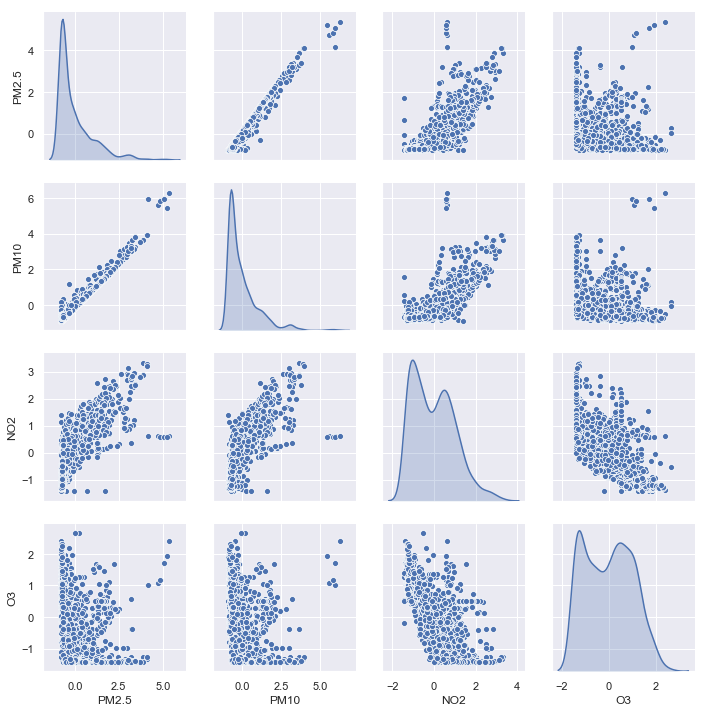

In [249]:
pca_data_zscore = result[cols_pca]
pca_data_norm = df[cols_pca]

sns.pairplot(pca_data_zscore, diag_kind="kde")

### plot range normalized


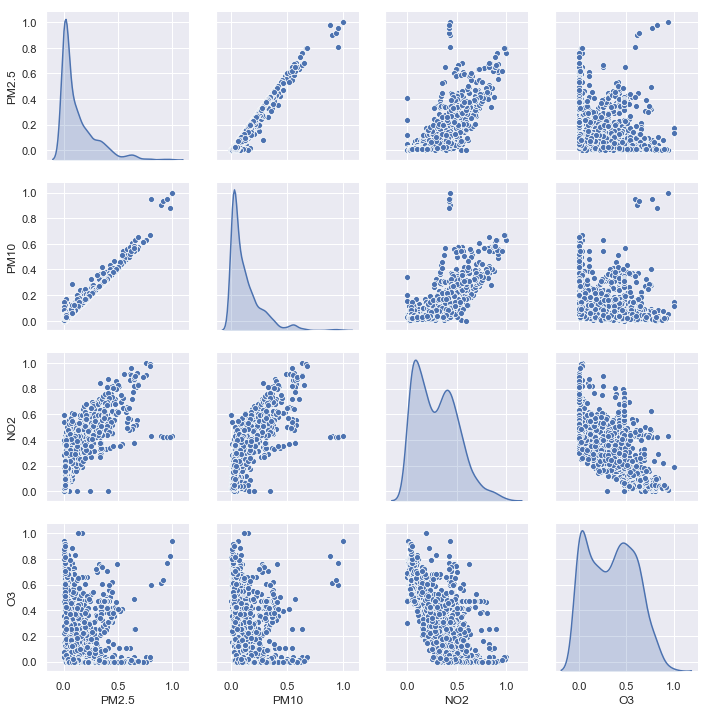

In [250]:
pca_data_norm = df[cols_pca]
sns.pairplot(pca_data_norm, diag_kind="kde")

In [251]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import seaborn as sns
#sns.set_style("darkgrid")
import sklearn

### Reading in data
#### selecting the relevant columns

In [252]:
# choose between the normalized or standardized version of the data
air_data_all = pd.read_csv('data_4comp_std_labeled.csv', delimiter=',')

# select only the columns that pca will be used on
cols = ["PM2.5","PM10","NO2","O3"]   
air_data= air_data_all[cols]

# colums with the ratings: categories 1,2,3,4
ratings = air_data_all['cat'] 
cat_labels = ["very low air quality", "low air quality", "medium air quality",  "good air quality"]

### Calculate SVD, eigenvectors and eigenvalues

In [253]:
# calculation of svd
u, s, vh = np.linalg.svd(air_data, 
                         full_matrices=True) 
eigenval, eigenvec = s ** 2, vh

In [254]:
## Calculate the coordinates of the data points in the projection axes of the space spanned 
## by the leading eigenvectors contained in $U$ 
u1 = u[:,0] * s[0] 
u2 = u[:,1] * s[1] 
u3 = u[:,2] * s[2]

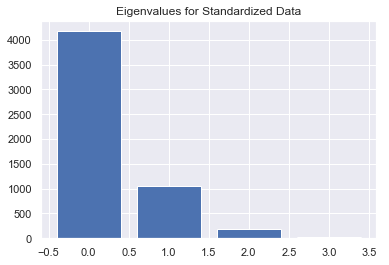

In [255]:
%matplotlib inline

# Sort eigenvectors (and -values) by descending order of eigenvalues.
sort = np.argsort(-eigenval)
eigenval = eigenval[sort]
eigenvec = eigenvec[:,sort]

# To get an idea of the eigenvalues we plot them.
figure = plt.figure('Eigenvalue comparison')
plt.bar(np.arange(len(eigenval)), eigenval)
plt.title('Eigenvalues for Standardized Data')
plt.savefig("eigenvalues_std.png")

## 2D SVD Projection

In [256]:
# define colors for the groups
colors = [ "#c70039", "#fa7f1d", "#FFC300" , "#97e115"  ]

In [257]:
# By SVD
projected_x= np.dot(air_data,vh.T)
v_norm= np.dot(vh.T, vh)


names = ["SVD-PC_"+str(x+1) for x in range(2)]
names.append('cat')
ds_svd = pd.DataFrame(data= np.c_[projected_x[:,0:2], air_data_all.cat], 
                      columns=names)
ds_svd['cat'] = ds_svd['cat'].astype(int)

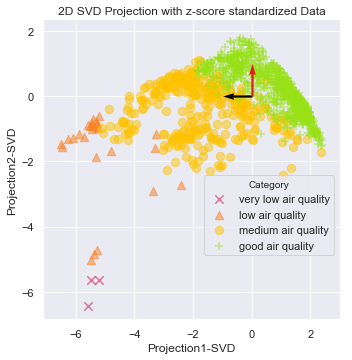

In [258]:
sns.lmplot('SVD-PC_1', 
           'SVD-PC_2', 
           data=ds_svd, 
           hue='cat', 
           markers=['x','^','o','+'],
           palette=sns.color_palette(colors,4),
           fit_reg=False,
           legend=False,
           scatter_kws={'alpha':0.5, "s": 70}, 
           height=5)
plt.quiver(0, 0, -v_norm[0,0],v_norm[1,0], scale_units='xy', angles='xy', scale=1, color = '#000000')
plt.quiver(0, 0, v_norm[0,1],v_norm[1,1], scale_units='xy', angles='xy', scale=1, color = '#e41a1c')
plt.xlabel('Projection1-SVD')
plt.ylabel('Projection2-SVD')
lgd = plt.legend(bbox_to_anchor=(1, 0.5), title='Category', labels = cat_labels);
ttl = plt.title('2D SVD Projection with z-score standardized Data', fontsize = "large")
#plt.savefig("Plots/svd_2d_std_groups.png")

## 3D SVD Projection


In [259]:
# set data to a Pandas Dataframa to ease plotting
names = ["U_"+str(x+1) for x in range(3)]
names.append('cat')
ds_us = pd.DataFrame(data= np.c_[u1, u2, u3, ratings], 
                     columns=names)

# groups of air quality
cat4 = ds_us[ds_us["cat"] == 4]
cat3 = ds_us[ds_us["cat"] == 3]
cat2 = ds_us[ds_us["cat"] == 2]
cat1 = ds_us[ds_us["cat"] == 1]


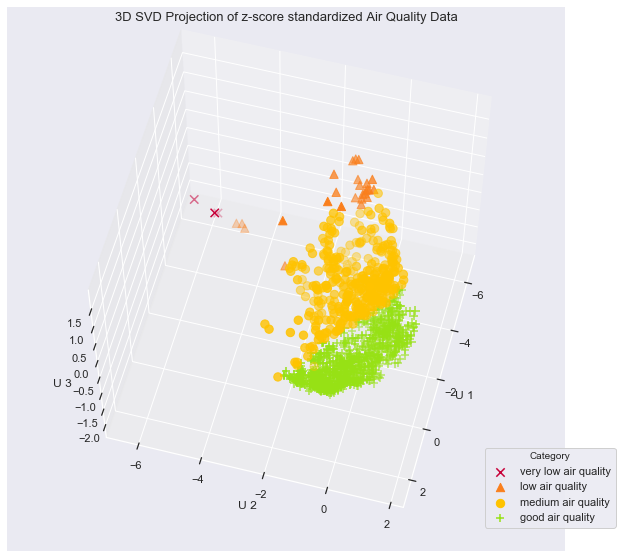

In [260]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# plot each air quality group individually
ax.scatter(cat1["U_1"], cat1["U_2"], cat1["U_3"], s=70, marker='x', c= colors[0])
ax.scatter(cat2["U_1"], cat2["U_2"], cat2["U_3"], s=70, marker='^', c= colors[1])
ax.scatter(cat3["U_1"], cat3["U_2"], cat3["U_3"], s=70, marker='o', c= colors[2])
ax.scatter(cat4["U_1"], cat4["U_2"], cat4["U_3"], s=70, marker='+', c= colors[3])

ax.set_xlabel('U 1')
ax.set_ylabel('U 2')
ax.set_zlabel('U 3')
ax.view_init(60,15)
ax.set_title('3D SVD Projection of z-score standardized Air Quality Data', fontsize= 13,  pad=30);
ax.legend(bbox_to_anchor=(1.1, 0.2), title='Category', labels = cat_labels, framealpha=0.9 );
#plt.savefig("Plots/svd_3d_std_groups.png",  bbox_inches='tight')

## Quality of projection

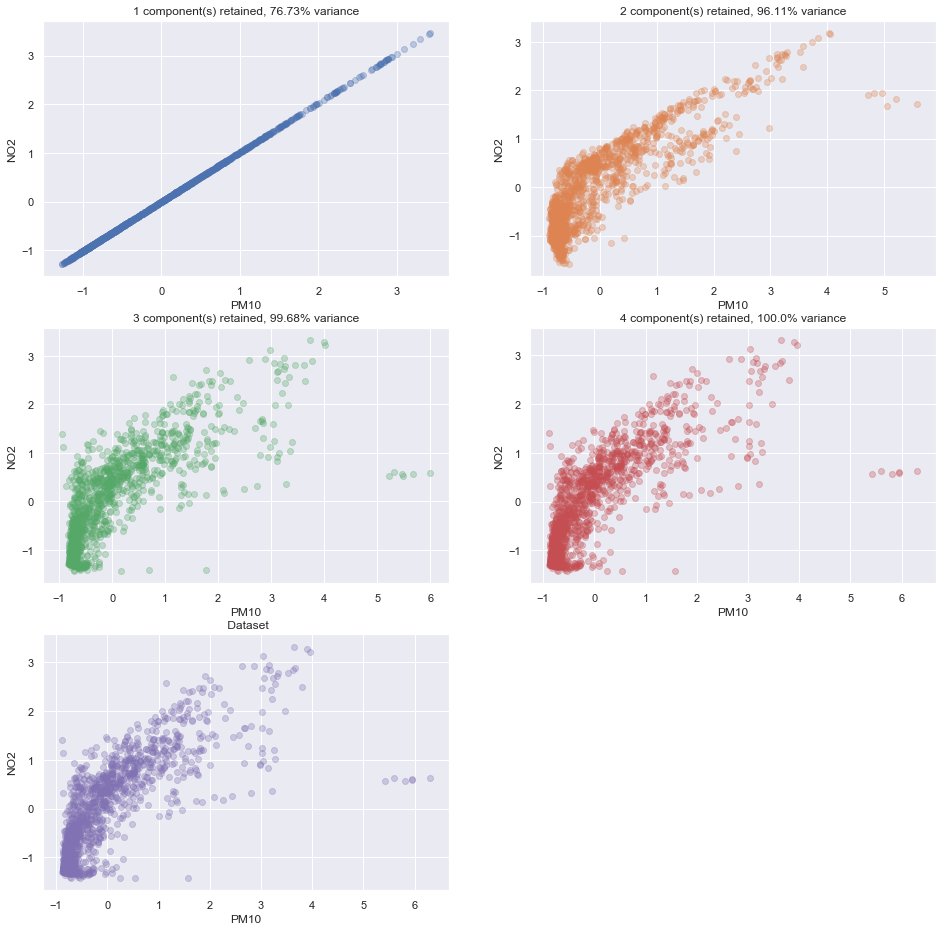

In [261]:
r = air_data.shape[1]
var_explained = np.cumsum(s**2)/np.sum(s**2)*100;

# You can change the features you would like to display, from 0 to 10
# ["PM2.5","PM10","NO2","O3"]

f1=1   #pm2.5
f2=2  #o3
fig, axs = plt.subplots(3,2, figsize=(16,16))
axs = axs.ravel()
approx = []

for n in range(1,r+1):
    approximation = np.dot((u[:,:n] * s[:n]),vh[:n,:]) 
    
    approx.append(approximation)
    
    #fig.add_subplot(1, 2, 1)
    sns.regplot(x=approximation[:,f1],
                y=approximation[:,f2],
                fit_reg=False,
                scatter_kws={'alpha':0.3}, ax=axs[n-1])
    axs[n-1].set(xlabel= 'PM10', 
           ylabel= 'NO2',
           title= (str(n) 
                   + ' component(s) retained, ' 
                   + str(round(var_explained[n-1],2)) 
                   + '% variance'))
    
sns.regplot(x=np.array(air_data)[:,f1],
            y=np.array(air_data)[:,f2],
            fit_reg=False,
            scatter_kws={'alpha':0.3}, ax=axs[4])
axs[4].set(xlabel='PM10', 
       ylabel= 'NO2',
       title=' Dataset');
    
fig.delaxes(axs[5])
fig.savefig("quality_svd.svg")

## Hidden factor model
### compute scoring in 0-100 rank scale

In [262]:
z, mu, c = np.linalg.svd(air_data, full_matrices=True)
ds = np.sum(np.sum(air_data.T @ air_data))

z1 = z[:,0]  # first singular 1340D scoring vector
mu_max = mu[0]
c1 = c[:,0]

print("c: \n", c)
for i in range(len(mu)):
    print("component ", i, ": influence: ", np.round(mu[i]**2 / ds * 100, 1), " %")

c: 
 [[-0.53439699 -0.52622558 -0.53376742  0.39063901]
 [-0.37875802 -0.41123258  0.19482816 -0.80589833]
 [-0.19579188 -0.3027146   0.81991876  0.44470512]
 [ 0.72981351 -0.67995461 -0.06976788 -0.01289986]]
component  0 : influence:  50.7  %
component  1 : influence:  12.8  %
component  2 : influence:  2.4  %
component  3 : influence:  0.2  %


In [263]:
# rescale z to convert it to 0-100 scale
alpha = 1/np.sum(c1)
print(alpha)

z_scaled = c1 * alpha
z_scaled

-2.63759422421188


array([ 1.40952242,  0.99900996,  0.51641952, -1.9249519 ])

### Calculate Model according to Mirkin, 2009: 215

In [264]:
# calculate new hidden factor and loading by multiplying it with the sqrt of the maximum singular value
# --> formula slide 17
mu_sqrt = np.sqrt(mu[0])
z_new = np.expand_dims(z[:,0] * mu_sqrt, axis=1)
c_new = np.expand_dims(c[:,0] * mu_sqrt, axis=1)

In [265]:
# calcualte the model, derive the residuals as difference between model and obversed data
model = z_new @ c_new.T
residuals = air_data - model

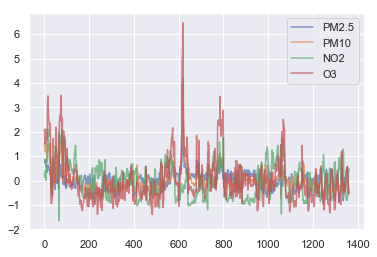

In [266]:
plt.plot(residuals, alpha=0.7)
plt.legend(residuals.columns)
plt.savefig("residuals_hidden.svg")

### Part 3: Clustering

In [267]:
def center_(x, cluster):
    """ finds the centroid of a cluster
    X - the original data matrix
     cluster - the set with indices of the objects belonging to the cluster
    """
    #number of columns
    num_features = x.shape[1]
    centroidC = []
    
    for j in range(num_features):
        zz = x[:, j]
        zc = []
        for i in cluster:
            zc.append(zz[i])
        centroidC.append(np.mean(zc))
    return centroidC


def distNorm(x ,remains, ranges, p):
    """ Finds the normalized distances of data points in 'remains' to reference point 'p' 
     X - the original data matrix;
     remains- the set of X-row indices under consideration
     ranges- the vector with ranges of data features 
     p - the data point the distances relate to
     distan- the output column of distances from a to remains """

    #number of columns
    num_features = x.shape[1]
    rr = len(remains)
    z = x[remains, :]
    az = np.tile(np.array(p), (rr, 1))
    rz = np.tile(np.array(ranges), (rr, 1))
    dz = (z - az) / rz
    dz = np.array(dz)
    ddz = dz * dz
    if num_features > 1:
        di = sum(ddz.T)
    else:
        di = ddz.T
    distan = di
    return distan


def separCluster(x0, remains, ranges, a, b):
    """  Builds a cluster by splitting the points around refernce point 'a' from those around reference point b 
    x0 - data matrix
    remains- the set of X-row indices under consideration
    ranges- the vector with ranges of data features 
    a, b - the reference points
    cluster - set with row indices of the objects belonging to the cluster  
    """
    
    dista = distNorm(x0, remains, ranges, a)
    distb = distNorm(x0, remains, ranges, b)
    clus = np.where(dista < distb)[0]
    cluster = []
    for i in clus:
        cluster.append(remains[i])
    return cluster

def anomalousPattern(x, remains, ranges, centroid, me):
    """ Builds one anomalous cluster based on the algorithm 'Separate/Conquer' (Mirkin, 1999, Machine Learning Journal) 
        X - data matrix,
        remains - set of its row indices (objects) under consideration,
        ranges - normalizing values: the vector with ranges of data features  
        centroid - initial center of the anomalous cluster being build
        me - vector to shift the 0 (origin) to,
        output: cluster - set of row indices in the anomalous cluster, 
        centroid -center of the cluster    """
        
    key = 1
    while key == 1:
        cluster = separCluster(x, remains, ranges, centroid, me)
        if len(cluster) != 0:
            newcenter = center_(x, cluster)
        if  len([i for i, j in zip(centroid, newcenter) if i == j]) != len(centroid):
            centroid = newcenter
        else:
            key = 0
    return (cluster, centroid)

def dist(x, remains, ranges, p):
    """ Calculates the normalized distances of data points in 'remains' to reference point 'p'   
        X - data matrix,
        remains - set of its row indices (objects) under consideration,
        ranges - normalizing values: the vector with ranges of data features  
    
       distan - the calculated normalized distances
    """

    #number of columns
    num_features = x.shape[1]
    rr = len(remains)
    distan = np.zeros((rr,1))    
    for j in range(num_features):
        z = x[:, j]
        z = z.reshape((-1,1))
        zz = z[remains]
        y = zz - p[j]
        y = y / ranges[j]
        y = np.array(y)
        yy = y * y
        distan = distan + yy
    return distan


def zscore(df):
    '''
    Apply zscore to all columns of given frame
    '''
    for col in list(df.columns):
        df[col] = (df[col] - df[col].mean()) / df[col].std(ddof=0)
    return df

def init_data(which='allair'):
    '''
    initialise data from csv or older cells.
    '''
    if which=='town':
        df = pd.read_csv('tons.dat', delimiter='\t', names=range(12))
        return zscore(df)
    if which=='airpca':
        df = ds_us.iloc[:,:3]
        return df
    if which=='allair':
        df = pd.read_csv('data_selection.csv')
        return zscore(df).iloc[:,5:]
    
    if which=='iris':
        df = pd.read_csv('iris.dat', delimiter=' ')
        return zscore(df)


In [268]:
def anomalous_cluster(threshold, data='allair'):
    ##### ****** Main body for the Iterative Anomalous Cluster   *****
    #### You should test and Validate it with Market Towns Data set    
    # normalization FLAG
    normalization = 0
    # threshold value (this is an example)

    data_ap =  init_data(data)# pandas dataframe
    #data_ap =  zscore_data_pca.iloc[:,:-1]# pandas dataframe 
    x = data_ap.values.astype(np.float32)
    #y = data.target
    #number of data points
    nn = x.shape[0]
    #number of features
    num_features = x.shape[1]

    # grand means
    me = []
    # maximum value
    mmax = []
    # minimum value
    mmin = []
    # ranges
    ranges = []
    # data structure to keep everything together
    ancl = []


    for j in range(num_features): # for each feature
        # use each row of the feature
        row = x[:, j]
        # add the mean to list of means
        me.append(np.mean(row))
        #add max to list of maxs
        mmax.append(np.max(row))
        #add min to list of mins
        mmin.append(np.min(row))
        if normalization:
            ranges.append(1);
        else:
            ranges.append(mmax[j] - mmin[j])
        if ranges[j] == 0:
            print("Variable num {} is contant!".format(j))
            ranges[j] = 1

    sy = np.divide((x - me), ranges)
    #standard error
    sY = np.array(sy)
    # sum of standard deviation
    d = np.sum(sY * sY)   # total data scatter of normalized data


    # x, me range, d
    remains = list(range(nn))  # current index set of residual data after some anomalous clusters are extracted
    numberC = 0; # anomalous cluster counter
    while(len(remains) != 0):
        distance = dist(x, remains, ranges, me) # finding normalised distance vector from remains data points to reference 'me'
        ind = np.argmax(distance)
        index = remains[ind]
        centroid = x[index, :] # initial anomalous center reference point
        numberC = numberC + 1

        (cluster, centroid) = anomalousPattern(x, remains, ranges, centroid, me) # finding AP cluster


        censtand = np.divide((np.asarray(centroid) - me), np.asarray(ranges)) # standardised centroid   
        dD = np.sum(np.divide(censtand * censtand.T * len(cluster) * 100, d))   # cluster contribution, per cent 

        remains = np.setdiff1d(remains, cluster) 
        # update the data structure that keeps everything together
        ancl.append(cluster)   # set of data points in the cluster
        ancl.append(censtand)  # standardised centroid
        ancl.append(dD) # proportion of the data scatter

    ancl = np.asarray(ancl)
    ancl = ancl.reshape((numberC, 3))
    ##aK = numberC
    b = 3
    ll = [] # list of clusters

    for ik in range(numberC):
        ll.append(len(ancl[ik, 0]))
    rl = [i for i in ll if i >= threshold] # list of clusters with at least threshold elements
    cent = []
    if(len(rl) == 0):
        print('Too great a threhsold!!!!!!!!!!!!!!!!!!!')
    else:
        print('number of clusters: ', len(rl))
        num_cents = 0
        for ik in range(numberC):
            cluster = ancl[ik,0]
            if(len(cluster) >= threshold):
                cent.append(ancl[ik, 1])
                num_cents += 1

    cent = np.asarray(cent)
    cent = cent.reshape((len(cent), x.shape[1]))

    init_partition = np.zeros((x.shape[0], len(cent)))
    for index, d in enumerate(x):
        dists = [np.linalg.norm(d - c) for c in cent]
        assign = np.argmin(dists)
        init_partition[index, assign] = 1
    return init_partition, cent


**a)** 

- Study the fuzzy c-means (FCM) program in the software package of your choice.
- Apply the program to your dataset at the same c parameter with random seeds. Do this for several different values of parameter c= c_min, ..., c_max. Plot the FCM cost function versus c.

- Analyse the graphic and comment if any number of clusters better fits your data than the others.

**The plots don't get shown as they are saved in the notebook directory instead. This can be changed by replacing the savefig calls with plt.show()** 

C:\Users\Bekki\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if sys.path[0] == '':


[6902.291614251846, 6902.291515779315, 6902.291584295408]
[4532.0903799004045, 4532.090404179088, 4532.090357707346]
[3367.107749568624, 3367.107602777154, 3367.107715024905]
[2684.2959920988587, 2684.295977044085, 2684.2956851430054]
[2224.522820089083, 2224.5226393305957, 2224.522967884689]
[1887.9885157563203, 1887.9885029818333, 1887.9884008341458]
[1641.9330252227658, 1641.9075878132062, 1642.076990716802]
[1451.4216795972982, 1451.4211885063912, 1451.4217482868046]
[1299.9221123349034, 1299.9161674101908, 1299.9053856048517]


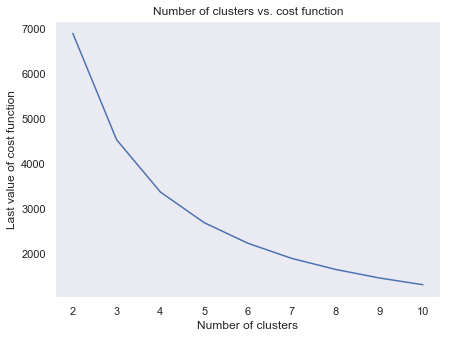

In [270]:
import skfuzzy as fuzz
colors_cluster = ['orange', 'm', 'k', 'Brown', 'c','g', 'y', 'ForestGreen']
colors_center = ['b','g', 'c', 'm', 'y', 'k']
shapes = ['s', 'x', '^', 'o', 's', 'p', 'v']
fig1, axes1 = plt.subplots(3,3, figsize=(10,10), subplot_kw=dict(projection='3d'))
# whole dataset for clustering
alldata = init_data()
# data result from PCA for visualization
visdata = init_data('airpca')

# vertically stack all of the data points in our set for the scikit library
alldata = np.vstack(alldata.iloc[:,n] for n in range(alldata.shape[1]))

# fuzzy partitioning coefficient list
fpcs = []
cluster_memberships = []
partitions = []
cost = [[] for center in range(9)]
all_centers = []

# iterate over axes in figure  to plot different amounts of clusters
for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    # cluster 3 times with random initialization and different seeds to ensure comparability between runs of the notebook
    centers, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, c=ncenters, m=2, error=0.005, maxiter=100, init=None, seed=1)
    cost[ncenters-2].append(jm[-1])

    centers, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, c=ncenters, m=2, error=0.005, maxiter=100, init=None, seed=42)
    cost[ncenters-2].append(jm[-1])

    centers, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, c=ncenters, m=2, error=0.005, maxiter=100, init=None, seed=1301)
    cost[ncenters-2].append(jm[-1])

    #store fpc values, partitions and centers for later
    fpcs.append(fpc)
    partitions.append(u)
    all_centers.append(centers)
    
    #plot assigned clusters, for each data point in set
    cluster_membership = np.argmax(u, axis=0)
    cluster_memberships.append(cluster_membership)
    for j in range(ncenters):
        ax.plot(visdata.iloc[:,0][cluster_membership==j],
                visdata.iloc[:,1][cluster_membership==j],
                visdata.iloc[:,2][cluster_membership==j],
               '.', color=colors_cluster[j%len(colors_cluster)])
        
    #mark center of each cluster
    i=0
    for pt in centers:
        ax.plot([pt[0]],pt[1],pt[2],
                'rs', mec='k')
        i += 1
    
    ax.set_title('Random initalization with\n{} clusters'.format(ncenters))

fig1.tight_layout()
fig1.savefig('random_clusters.png')

# print the last cost function value for each run.
for costs in cost:
    print(costs)

ax_cost = plt.subplot()
ax_cost.plot(range(2,9+2), np.array(cost)[:,0])
ax_cost.set_xlabel('Number of clusters')
ax_cost.set_ylabel('Last value of cost function')
ax_cost.set_title('Number of clusters vs. cost function')
fig1.tight_layout()
# default figsize
fig1.set_size_inches((6.4,4.8))
ax_cost.grid()
fig1.tight_layout()
fig1.savefig('cost_fcm.png')

## **b)**
- Study the Anomalous Pattern (AP) clustering algorithm. 
- Test the implementation with the benchmark data sets provided to you.

**For task b), we have done the same procedure for both of the sample datasets, to comment on the workings of the AP clustering algorithm.**

number of clusters:  3
(1361, 11)


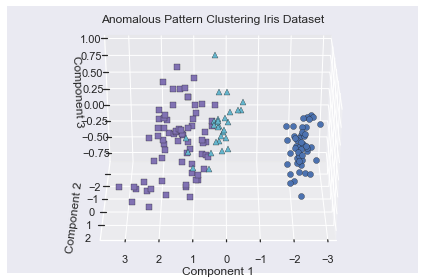

In [271]:
# Using PCA to get an easy 3D representation for the data sets
from sklearn.decomposition import PCA

# for the threshold, we chose to differ from what is given on the report to comment on the correct number of clusters - in the paper, we explain this in more detail.
init_part, cent = anomalous_cluster(19,'iris')

pca = PCA(n_components=3)
goal = pca.fit_transform(init_data('iris'))
fig, ax = plt.subplots(1,1, subplot_kw=dict(projection='3d'))

# determine which cluster each line belongs to
membership_iris = np.argmax(init_part, axis=1)
scatter_style = ['ms', 'bo', 'c^']
# plot a 
for ctr in range(3):
    ax.plot(goal[:,0][membership_iris==ctr],
            goal[:,1][membership_iris==ctr],
            goal[:,2][membership_iris==ctr],
            scatter_style[ctr], mec='k', mew=.3, )
ax.set_title('Anomalous Pattern Clustering Iris Dataset')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.view_init(30,90)
fig.tight_layout()
plt.savefig('iris_clustering.png')
print(init_data().shape)

number of clusters:  7


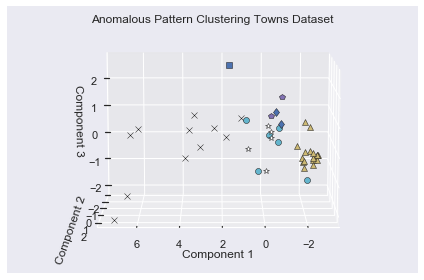

In [272]:
towns = init_data('town')
# for this dataset, we chose the same threshold as given in the report
init_part, cent = anomalous_cluster(2, 'town')
membership_towns = np.argmax(init_part, axis=1)
pca = PCA(n_components=3)
goal = pca.fit_transform(towns)
shapes = ['kx', 'co','y^','s','mp','w*','bd',]
fig, ax = plt.subplots(1,1, subplot_kw=dict(projection='3d'))
for ctr in range(7):
    ax.plot(goal[:,0][membership_towns==ctr],
            goal[:,1][membership_towns==ctr],
            goal[:,2][membership_towns==ctr], shapes[ctr], mec='k', mew=.5)
    
ax.set_title('Anomalous Pattern Clustering Towns Dataset')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.view_init(10,90)
fig.tight_layout()
#plt.savefig('towns_clustering.png')

## **c)** 
- Take the Anomalous Clustering as the initialization algorithm to the fuzzy c-means and apply the Anomalous Patterns_FCM (AP-FCM) to your data set.
- Discuss the options taken for setting the AP parameters. Present and visualize the found fuzzy partitions of AP-FCM.

**The clustering and plotting procedure is identical to task a). The only difference is that the AP clustering algorithm is used to initialize the fuzzy clustering process.** 

C:\Users\Bekki\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


number of clusters:  2


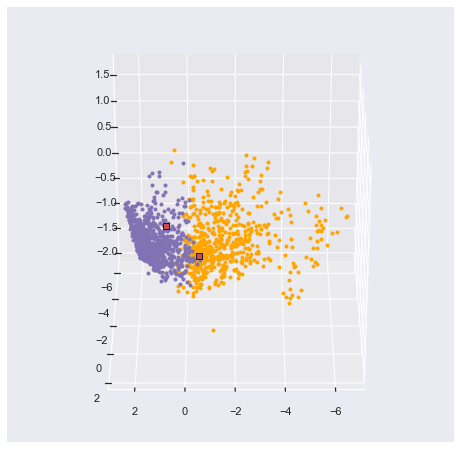

In [273]:
import skfuzzy as fuzz

colors_cluster = ['orange', 'm', 'k', 'Brown', 'c','g', 'y', 'ForestGreen']
colors_center = ['b','g', 'c', 'm', 'y', 'k']
shapes = ['s', 'x', '^', 'o', 's']

fig, ax = plt.subplots(1,1, figsize=(8,8), subplot_kw=dict(projection='3d'))

visdata = init_data('airpca')
alldata = init_data()
alldata = np.vstack(alldata.iloc[:,n] for n in range(alldata.shape[1]))

# The threshold of 300 cluster members was chosen to 
ac = anomalous_cluster(300)
init_partition = ac[0].T
centers, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data=alldata,c=len(centers), m=2, error=0.005, maxiter=100, init=init_partition)

# save relevant data for plotting later on
centers_ap = centers
fpc_ap = fpc
partition_ap = u
cluster_membership = np.argmax(u, axis=0)

#plot assigned clusters, for each data point in set
for j in range(len(centers)):
    ax.plot(visdata.iloc[:,0][cluster_membership==j],
            visdata.iloc[:,1][cluster_membership==j],
            visdata.iloc[:,2][cluster_membership==j],
           '.', color=colors_cluster[j])
#mark center of each cluster
i=0
for pt in centers:
    ax.plot([pt[0]],pt[1],pt[2],
            'rs', mec='k')
    i += 1

ax.view_init(30, 90)
fig.savefig('AP_2clusters.png')

**d)**
- Discuss the results obtained by Anomalous Patterns FCM for your data case respecting the following: 
    - (i) location of the initial prototypes
    - (ii) choice of the number of clusters.

**This task is fully realized in the paper.**

**e)**
- Apply, at least, two validation indices, like the *Adjust Rand Index (ARI)* and *Xie-Beni*, to access the quality of the fuzzy c-partitions obtained in **a)**. 
- Compare these results with the one of Anomalous Patterns FCM getting in **c)**.


**We chose to apply 2 internal indices, as our data is not labelled. This is explained more in-depth in the paper, together with the results and interpretation.**

Difference FPC AP, random: 4.034494810678524e-05
XBI Difference between AP and random: 0.0002939864162870287


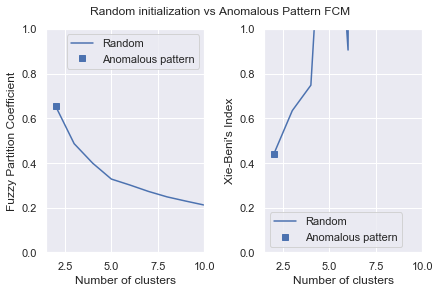

In [274]:
from scipy.spatial.distance import cdist

#simple implementation of xie_beni index, following the slides.
def xie_beni(data, partition, centers, m=2):
    n = data.shape[0]
    c = centers.shape[0]
    partition_m = partition**m
    d_sq = cdist(data, centers)**2
    centers_sq = cdist(centers, centers)**2
    centers_sq[centers_sq==0] = np.inf
    
    validity = np.sum(partition_m.T*d_sq) / (n * np.min(centers_sq))
    return validity

# plot the FPC, as calculated by the scikit fcm algorithm. includes value with AP clustering initialization.
fig, axs = plt.subplots(1,2, constrained_layout=True)
fig.suptitle('Random initialization vs Anomalous Pattern FCM')
axs[0].plot(range(2, len(fpcs)+2), fpcs, label='Random')
axs[0].plot(2,fpc_ap, 'bs', label='Anomalous pattern')
axs[0].set_ylim(0,1)
axs[0].set_xlim(1.5,10)
axs[0].set_xlabel('Number of clusters')
axs[0].set_ylabel('Fuzzy Partition Coefficient')
axs[0].legend()
print('Difference FPC AP, random: {}'.format(fpc_ap - fpcs[0]))
xbi_values = []
for c in range(0,len(fpcs)):
    xbi = xie_beni(init_data(), partitions[c], all_centers[c])
    xbi_values.append(xbi)   
xbi_ap = xie_beni(init_data(), partition_ap, centers_ap)

# plot Xie-Beni score for different number of clusters, including the AP value.
axs[1].plot(range(2, len(xbi_values)+2), xbi_values, label='Random')
axs[1].plot(2,xbi_ap, 'bs', label='Anomalous pattern')
axs[1].set_ylim(0,1)
axs[1].set_xlim(1.5,10)
axs[1].set_xlabel('Number of clusters')
axs[1].set_ylabel('Xie-Beni\'s Index')
axs[1].legend()
print('XBI Difference between AP and random: {}'.format(abs(xbi_ap-xbi_values[0])))
fig.savefig('validity_indices.png')

**f)**
- Make an interpretation of the found clusters by the AnomalousPatterns_FCM for your data as discussed in the classes.

**This task is completed in the paper.

### This is just legacy code from when I tried to implement the FCM algorithm by myself based on the slides. It may not be fully functional or complete. It wasn't used for any of the projects results.

In [275]:
# THIS IMPLEMENTATION WILL NOT BE USED FOR THE PROJECT
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
#Here comes the fuzzy clustering!#
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# First of all, we need to define our constraints and such
def constraint_membership(arr):
    for row in range(arr.shape[0]):
        if np.allclose(arr[row,:],np.ones_like(arr[row,:])):
            return False
    return True

# Matrix X (the fuzzy c-partition) consists of each data point in a cluster
# and their membership value which is contained in [0,1]
# which means we have a cxn matrix of k-tuples
# where k is the number of attributes our dataset has
# (I THINK)
def fuzzy_c_means(x, centers):
    # Secondly, we will define the parameters
    # number of clusters (renamed from sample code)
    num_clusters = num_cents
    # weighting exponent (Degree of fuzzification) m >=1.0 where 1.0 means crisp
    m = 2.0
    # maximum number of iterations T, arbitrarily capped at 100
    T = 100
    #Termination measure? E_t = norm(V_t -V_(t-1)) --> implemented as epsilon=.001
    #!!! V_t is a set of vectors of prototypes or centroids after t iterations

    # change in cluster centers compared to last 
    change_centers = np.linalg.norm(centers)

    # epsilon as termination factor as suggested in slides
    epsilon = 0.005
    # current iteration
    iteration = 0
    axs = []
    while iteration <= T and change_centers > epsilon:
        old_centers = np.copy(centers)
        iteration += 1
        #print('*****\nStarting iteration no. {}\n*****'.format(iteration))

        # Calculate U_t - formula:
        #
        # (1 /  D_(ik)) ** (2/(m-1)) 
        # / sum_(j=1->c)(1/D_(jk)) ** 2/(m-1)
        #
        # D_(ik) = sqrt(norm(x_k - v_i))
        # check if this works! may have broadcasting errors
        distances = np.array(np.zeros((x.shape[0],centers.shape[0])))
        # calculate a new row in the distance matrix for each data point
        for center in range(centers.shape[0]):
            for row in range(x.shape[0]):
                distances_pt_to_ctrs = np.sqrt(np.linalg.norm(x[row,:] - centers[center,:]))
                distances[row, center] = distances_pt_to_ctrs


        # U_t is the membership matrix
        membership = np.zeros_like(distances)
        # Here's the plan
        # we calculate the membership function row-wise, that is
        # the sum of 
        for row in range(x.shape[0]):
            distance_to_clusters = (1/distances[row,:]) ** (2/(m-1))
            sum_distances_to_clusters = np.sum(distance_to_clusters)
            membership_row = distance_to_clusters / sum_distances_to_clusters
            membership[row,:] = membership_row
        assert constraint_membership(membership)
        # establish new centers
        for center in range(centers.shape[0]):
            # membership[:,center] is a column containing the membership of each data point to that center
            factors = np.asarray(membership[:,center] ** m)
            factors_broadcast = np.asarray([factors for i in range(x.shape[1])])

            # we have to transpose for the element wise multiplication of two nxm matrices
            # axis = 0 to keep the dimensions
            centers[center,:] = np.sum(factors_broadcast.T * x, axis=0)\
                                / np.atleast_2d(np.sum(factors)).T
        change_centers = np.linalg.norm(centers - old_centers)
    return centers, membership, distances

In [276]:
# THIS IMPLEMENTATION WILL NOT BE USED FOR THE PROJECT

# now the same with my own c means implementation
#colors = ['b', 'orange', 'g', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
# whatever may this number mean?
#np.random.seed(28980)
#fig1, axes1 = plt.subplots(2,2, figsize=(8,8))
#alldata = pd.DataFrame(x)
#fpcs = []
#np.random.seed(28980)
#for ncenters, ax in enumerate(axes1.reshape(-1), 2):
#    centers = np.random.rand(ncenters, alldata.shape[1])
#    print(ncenters)
#    centers, membership, distances = fuzzy_c_means(x, centers)
#    
#    #store fpc values for later
#    fpcs.append(fpc)
#    
#    #plot assigned clusters, for each data point in set
#    cluster_membership = np.argmax(membership, axis=1)
#    for j in range(len(centers)):
#        print(j)
#        ax.plot(alldata[cluster_membership == j].iloc[:,0],
#               alldata[cluster_membership == j].iloc[:,1],
#               '.', color=colors[j])
#    
#    #mark center of each cluster
#    for pt in centers:
#        ax.plot(pt[0], pt[1], 'rs')
#        
#    ax.set_title(' i did a {} cluster'.format(ncenters))
#    ax.axis('off')
#    
#fig1.tight_layout()
#print(fpcs)
